In [40]:
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter
import pickle

df = pd.read_csv('./data.csv')
model_file = "./model.sav"

# Remove id column
df.drop(["Unnamed: 0"],  axis=1, inplace=True)

In [41]:
attractions_cols = list(range(7,21))

df_user_prefs = df.drop(df.columns[attractions_cols], axis=1)

In [42]:
df_user_prefs.head(5)

,age,gender,open_closed_spaces,classical_new_places,fast_slow_trip,more_short_less_long_trip,alone_company,music_style_Forró/Sertanejo,music_style_MPB,music_style_Pop,...,fav_scenario_Montanha,fav_scenario_Praia,fav_place_Lojas/shoppings/centros comercias,fav_place_Museus,fav_place_Parques,fav_place_Restaurantes típicos,fav_place_Trilhas,transport_Carro Alugado,transport_Transporte Público,transport_Táxi/Uber/99
0,23,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,24,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,21,1,0,0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,24,1,0,0,1,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,26,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [83]:
df[['ibirapuera', 'masp', 'jadim_pref', 'eataly', 'mirante',
       'terraco_italia', 'merc_munic', 'vinte_cinco_marco', 'seu_quintal',
       'liberdade', 'la_guapa', 'beco_batman', 'omalleys', 'av_paul']].values

array([[5, 3, 3, ..., 5, 4, 5],
       [4, 2, 5, ..., 5, 2, 5],
       [5, 5, 5, ..., 5, 5, 5],
       ...,
       [2, 5, 4, ..., 4, 5, 3],
       [3, 2, 3, ..., 4, 4, 3],
       [5, 5, 4, ..., 5, 1, 3]])

In [43]:
scaler = StandardScaler()
normData = scaler.fit_transform(df_user_prefs)
df_user_prefs = pd.DataFrame(normData, columns=df_user_prefs.columns)

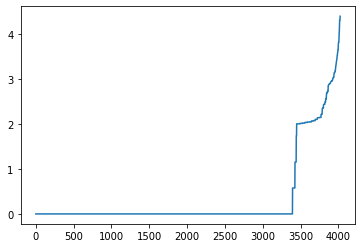

In [61]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_user_prefs)
distances, indices = nbrs.kneighbors(df_user_prefs)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [66]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=10).fit(df_user_prefs)
labelsDBSCAN = db.labels_

n_clusters_ = len(set(labelsDBSCAN)) - (1 if -1 in labelsDBSCAN else 0)
n_noise_ = list(labelsDBSCAN).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 67
Estimated number of noise points: 2259


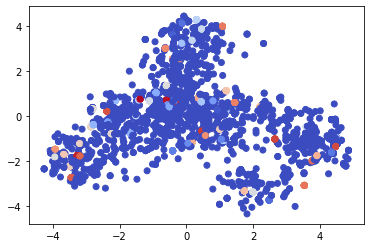

In [67]:
df_values = df_user_prefs.values
pca = PCA(n_components=2)
pca_values = pca.fit_transform(df_values)
pca_df = pd.DataFrame(data=pca_values, columns=['C1','C2'])

# Visualize the clusters
plt.scatter(pca_df['C1'], pca_df['C2'], c=labelsDBSCAN, cmap="coolwarm")

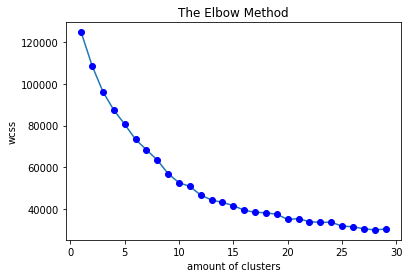

In [5]:
wcss = []
amount_clusters = range(1,30)

for n in amount_clusters:
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(df_user_prefs)
    wcss.append(kmeans.inertia_)
  
plt.title('The Elbow Method')
plt.xlabel("amount of clusters")
plt.ylabel("wcss")
plt.plot(amount_clusters, wcss)
plt.plot(amount_clusters, wcss, 'bo')

In [6]:
df_values = df_user_prefs.values
pca = PCA(n_components=2)
pca_values = pca.fit_transform(df_values)
pca_df = pd.DataFrame(data=pca_values, columns=['C1','C2'])

pca_df

,C1,C2
0,-0.300162,2.789636
1,0.928941,0.278084
2,-0.421325,3.621834
3,-3.935699,-2.368873
4,-1.151256,-1.470019
...,...,...
4020,-2.156723,-0.797216
4021,-0.352588,3.434759
4022,0.119844,-0.061270
4023,0.564052,-0.862734


In [7]:
def get_model(amt_clusters):
  try:
    model = pickle.load(open(model_file, 'rb'))
    labels = model.labels_
    print("Loaded model")
    return model
  except:
    print("Saved model")
    model = KMeans(n_clusters=amt_clusters, random_state=12345)
    pickle.dump(model, open(model_file, 'wb'))
    return model

model = get_model(9)
model.fit(df_user_prefs)
labels = model.predict(df_user_prefs)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator KMeans from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Loaded model


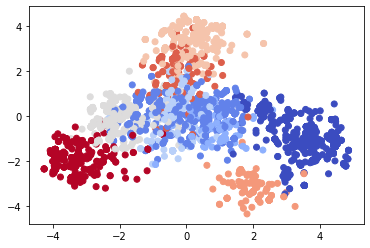

In [8]:
# Visualize the clusters
plt.scatter(pca_df['C1'], pca_df['C2'], c=labels, cmap="coolwarm")

In [9]:
Counter(labels)

Counter({7: 205,
         1: 780,
         5: 578,
         8: 539,
         6: 178,
         2: 226,
         0: 685,
         3: 313,
         4: 521})

In [10]:
df.head(3)

,age,gender,open_closed_spaces,classical_new_places,fast_slow_trip,more_short_less_long_trip,alone_company,ibirapuera,masp,jadim_pref,...,fav_scenario_Montanha,fav_scenario_Praia,fav_place_Lojas/shoppings/centros comercias,fav_place_Museus,fav_place_Parques,fav_place_Restaurantes típicos,fav_place_Trilhas,transport_Carro Alugado,transport_Transporte Público,transport_Táxi/Uber/99
0,23,1,0,0,0,1,0,5,3,3,...,0,0,0,0,0,1,0,0,1,0
1,24,0,0,0,0,1,0,4,2,5,...,0,0,0,0,1,0,0,1,0,0
2,21,1,0,0,1,1,0,5,5,5,...,0,0,1,0,0,0,0,1,0,0


In [11]:
df.insert(0, "label", labels)

In [12]:
df.head(3)

,label,age,gender,open_closed_spaces,classical_new_places,fast_slow_trip,more_short_less_long_trip,alone_company,ibirapuera,masp,...,fav_scenario_Montanha,fav_scenario_Praia,fav_place_Lojas/shoppings/centros comercias,fav_place_Museus,fav_place_Parques,fav_place_Restaurantes típicos,fav_place_Trilhas,transport_Carro Alugado,transport_Transporte Público,transport_Táxi/Uber/99
0,7,23,1,0,0,0,1,0,5,3,...,0,0,0,0,0,1,0,0,1,0
1,1,24,0,0,0,0,1,0,4,2,...,0,0,0,0,1,0,0,1,0,0
2,5,21,1,0,0,1,1,0,5,5,...,0,0,1,0,0,0,0,1,0,0


In [68]:
x = df_user_prefs.values
y = labelsDBSCAN

In [69]:
# Cluster 0
sampleC0 = [  23,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0]
# Cluster 4
sampleC4 = [ 22,  1,  0,  1,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  1]
# Cluster 8
sampleC8 = [ 24,  1,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  1,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  1]

In [15]:
# np.array(df[df['label'] == 4])[20]

In [70]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state=1986,
                           criterion='gini',
                           max_depth=10)
classifier_dt.fit(x, y)

DecisionTreeClassifier(max_depth=10, random_state=1986)

In [71]:
classifier_dt.predict([sampleC0, sampleC4, sampleC8])

array([ 6, 17, 57])

In [72]:
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(classifier_dt, x, y,
                            scoring='accuracy', cv=5)

print(scores_dt.mean())

0.7873291925465838


In [73]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=1986,
                           criterion='gini',
                           max_depth=10,
                           n_estimators=50,
                           n_jobs=-1)
scores_rf = cross_val_score(classifier_rf, x, y,
                            scoring='accuracy', cv=5)

print(scores_rf.mean())

0.9284472049689441


In [74]:
classifier_rf.fit(x, y)
features_importance = zip(classifier_rf.feature_importances_, features)

grouped_feature_importance = {}
for importance, feature in sorted(features_importance, reverse=True):
    if 'transport' in feature:
        if 'transport' in grouped_feature_importance:
            grouped_feature_importance['transport'] += importance*100
        else:
            grouped_feature_importance['transport'] = 1
    elif 'movie' in feature:
        if 'movie' in grouped_feature_importance:
            grouped_feature_importance['movie'] += importance*100
        else:
            grouped_feature_importance['movie'] = 1
    elif 'music' in feature:
        if 'music' in grouped_feature_importance:
            grouped_feature_importance['music'] += importance*100
        else:
            grouped_feature_importance['music'] = 1
    elif 'scenario' in feature:
        if 'scenario' in grouped_feature_importance:
            grouped_feature_importance['scenario'] += importance*100
        else:
            grouped_feature_importance['scenario'] = 1
    elif 'motivation' in feature:
        if 'motivation' in grouped_feature_importance:
            grouped_feature_importance['motivation'] += importance*100
        else:
            grouped_feature_importance['motivation'] = 1
    elif 'place' in feature:
        if 'place' in grouped_feature_importance:
            grouped_feature_importance['place'] += importance*100
        else:
            grouped_feature_importance['place'] = 1
    else:
        if f"{feature}" in grouped_feature_importance:
            grouped_feature_importance[f"{feature}"] += importance*100
        else:
            grouped_feature_importance[f"{feature}"] = 1

for value in sorted(grouped_feature_importance, key=grouped_feature_importance.get, reverse=True):
    print("%s: %f%%" % (value, grouped_feature_importance[value]))

music: 14.090854%
place: 11.524093%
movie: 9.206241%
scenario: 9.118965%
motivation: 4.661642%
transport: 4.257373%
age: 1.000000%
fast_slow_trip: 1.000000%
alone_company: 1.000000%
gender: 1.000000%
more_short_less_long_trip: 1.000000%
open_closed_spaces: 1.000000%


In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {
            "criterion": ['entropy', 'gini'],
            "n_estimators": [25, 50, 75],
            "bootstrap": [False, True],
            "max_depth": [3, 5, 10],
            "max_features": ['auto', 0.1, 0.2, 0.3]
}
grid_search = GridSearchCV(classifier_rf, param_grid, scoring="accuracy")
grid_search.fit(x, y)

classifier_rf = grid_search.best_estimator_ 
grid_search.best_params_, grid_search.best_score_

({'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': 10,
  'max_features': 'auto',
  'n_estimators': 75},
 0.9518012422360249)

In [77]:
def get_attractions_means(user_data):
  attractions_means = {}
  user_cluster = int(model.predict(user_data))
  print("User Cluster: " + str(user_cluster))
  df_cluster = df[df["label"] == user_cluster]
  for i in range(8,22):
    attraction_mean = df_cluster.iloc[:,i].mean()
    attractions_means[df.columns[i]] = attraction_mean
  return attractions_means

def get_recommended_attractions(user_data):
  means = get_attractions_means(user_data)
  return sorted(means, key=means.get, reverse=True)[:5]

In [ ]:
user = [
    [21,  1,  0,  0,  0,  1,  0, 0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0, 0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0],
]

get_recommended_attractions(user)